# Kaggle Playground Season 5 Episode 2: Podcast Listening Time Prediction

# Imports

In [34]:
# !pip install missingno
# !pip install sweetviz
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 24.8 MB/s eta 0:00:0000:010:01


In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import sweetviz as sv


# from ydata_profiling import ProfileReport


# Data Loading

In [30]:
train = pd.read_csv('train.csv')
display(train)
test = pd.read_csv('test.csv')
display(test)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,Mind & Body,Episode 100,21.05,Health,65.77,Saturday,Evening,96.40,3.0,Negative
249996,999996,Joke Junction,Episode 85,85.50,Comedy,41.47,Saturday,Night,30.52,2.0,Negative
249997,999997,Joke Junction,Episode 63,12.11,Comedy,25.92,Thursday,Evening,73.69,1.0,Neutral
249998,999998,Market Masters,Episode 46,113.46,Business,43.47,Friday,Night,93.59,3.0,Positive


# Data Description
## First Impression
1. ID - Useless this is for prediction
2. Podcast Name - Maybe certain podcasts have more dedicated viewers, maybe some have less dedicated video (Niche podcasts [Dedicated] vs General podcasts)
3. Episode Title - Perhaps Useless > Charts will help > maybe episode 1 has lower %listening time
4. Episode Length - This looks like it'll be the strongest variable.
5. Genre - Maybe similar to podcast name?
6. Host Popularity Percentage - Might be useful > Charts will help (Maybe needs to be used in conjuction to guest popularity) a x b
7. Publication Day - My initial thoughts is that this should have no impact
8. Publication Time - My initial thoughts is that this also should have no impact
9. Guest Popularity Percentage - Similar with host -- new idea that maybe you take the higher value of whatevers offered...? or lower ? >> I.e. My favourite podcast host is Taylor swift (yay!) but she is doing a podcast with Elon must (boo!) will my distaste for Elon trump my love for Taylor Swift?
10. Number of Ads - Might be bad, but also could be an indication that a podcast is successful that is has ads . . .
11. Episode Sentiment - Is it talking about what people thought, or the vibe of the pod? If so, it may explain itself.
12. Listening Time Minutes - Outcome variable.


# Data Exploration

In [6]:
train.sample(10)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
103785,103785,Comedy Corner,Episode 82,56.46,Comedy,50.63,Thursday,Afternoon,79.56,2.0,Neutral,26.88779
353422,353422,Home & Living,Episode 90,72.65,Lifestyle,69.57,Wednesday,Night,34.20,1.0,Positive,55.69271
479087,479087,Tune Time,Episode 38,42.89,Music,68.36,Sunday,Night,40.59,0.0,Negative,27.94118
158987,158987,Business Insights,Episode 81,75.95,Business,47.61,Sunday,Evening,62.61,1.0,Neutral,42.62324
574098,574098,Current Affairs,Episode 13,20.03,News,63.67,Tuesday,Evening,NaN,0.0,Neutral,13.91035
569124,569124,Study Sessions,Episode 97,52.42,Education,92.83,Wednesday,Afternoon,44.66,1.0,Positive,39.75039
406893,406893,Athlete's Arena,Episode 32,48.12,Sports,39.19,Friday,Afternoon,55.90,1.0,Negative,29.39000
601344,601344,Tech Talks,Episode 77,6.33,Technology,38.23,Thursday,Afternoon,81.04,2.0,Positive,5.18000
170548,170548,Digital Digest,Episode 32,88.51,Technology,57.22,Tuesday,Night,NaN,0.0,Neutral,65.02621
58127,58127,Criminal Minds,Episode 73,33.95,True Crime,95.84,Friday,Afternoon,2.44,1.0,Positive,20.20244


A Random Sample of 10, shows some missing values, lets look deeply into missing values, and perhaps look into imputation

## Missing Values
Final thoughts about missing values:
- Episode length is the most important value we have to predict listening time. Imputing it, to me, just seems like it would just be adding unneccssary variation to our most import row. Dropping the NA values are best.
    - One of the logical reasons why imputing does not seem good is that things like: Genre, Podcast Name, Episode -- you *would* think that they have similar characteristics. But they do not.

- For missing guest popularity, just make guest pop = host pop

<Axes: >

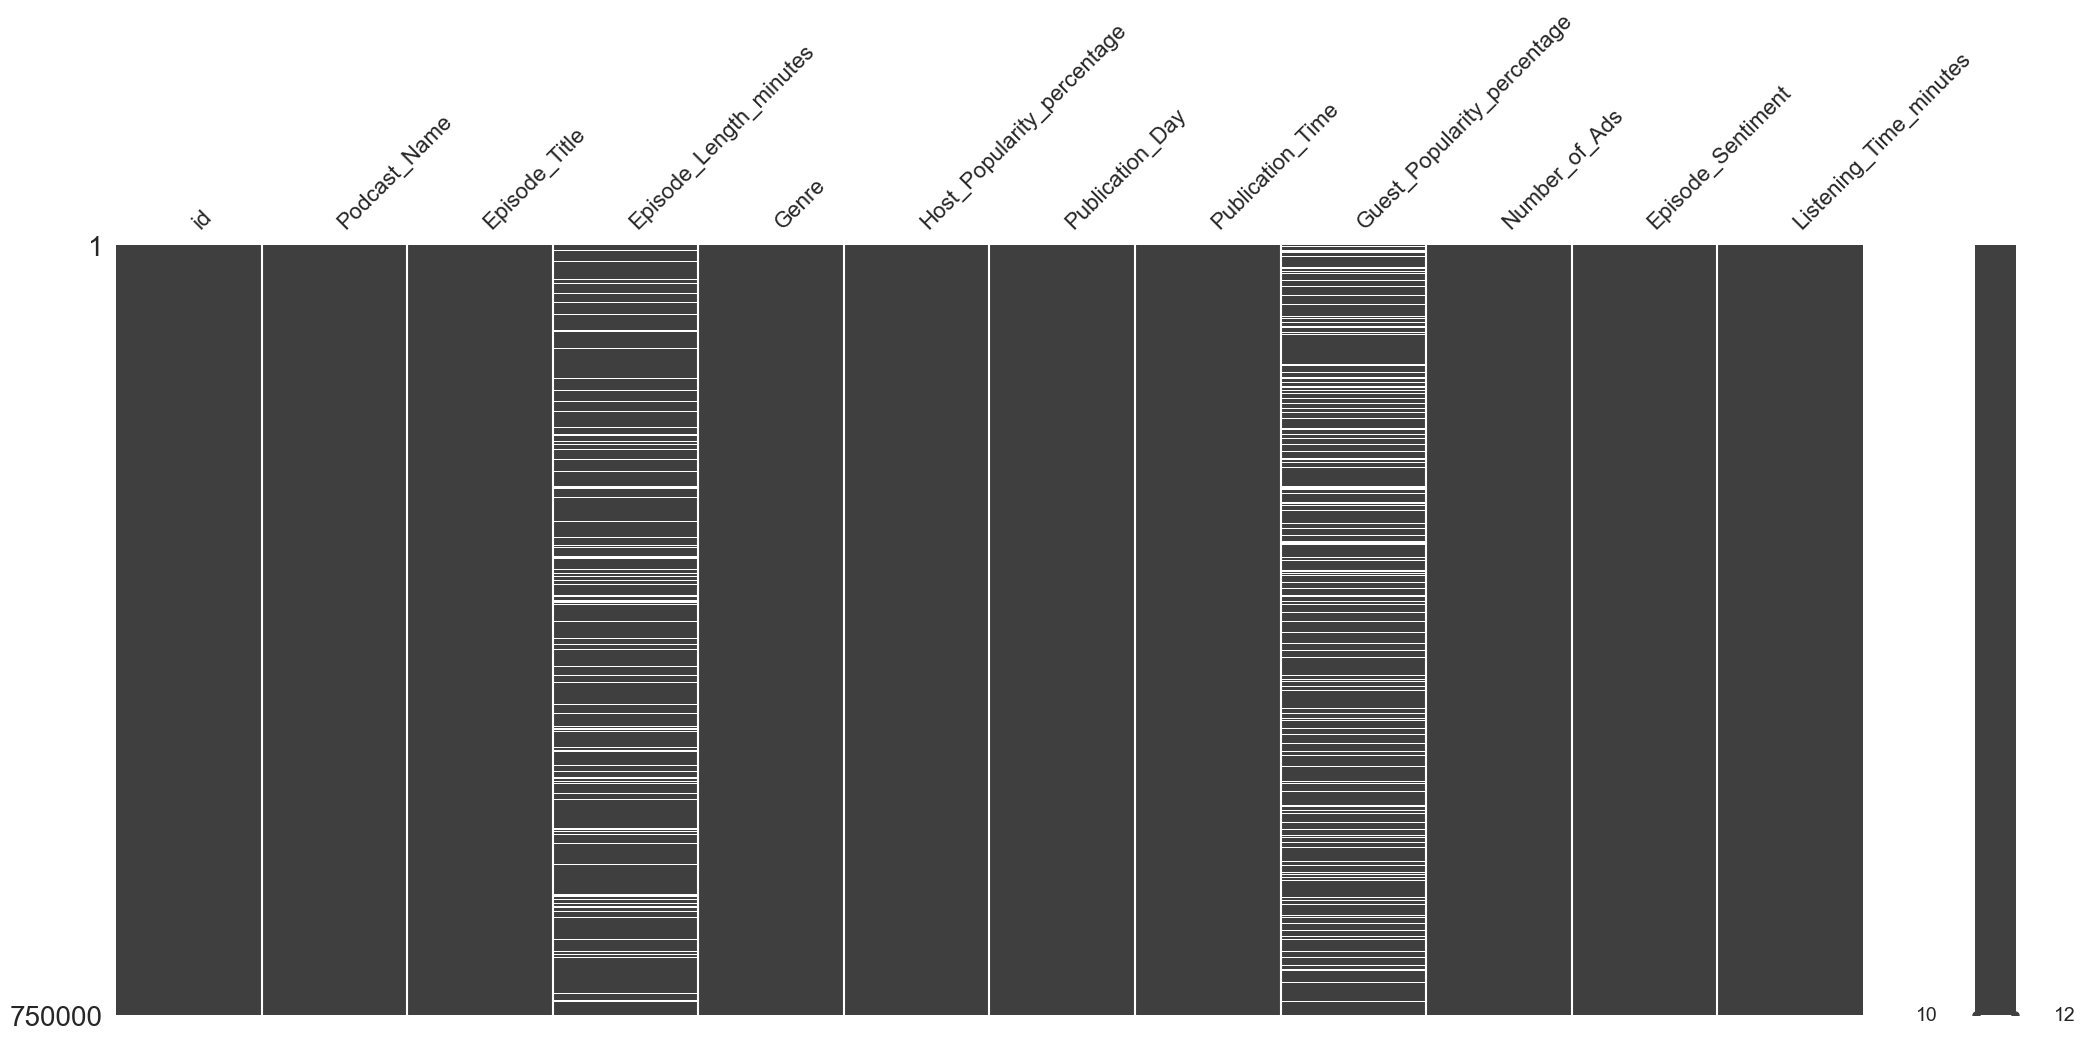

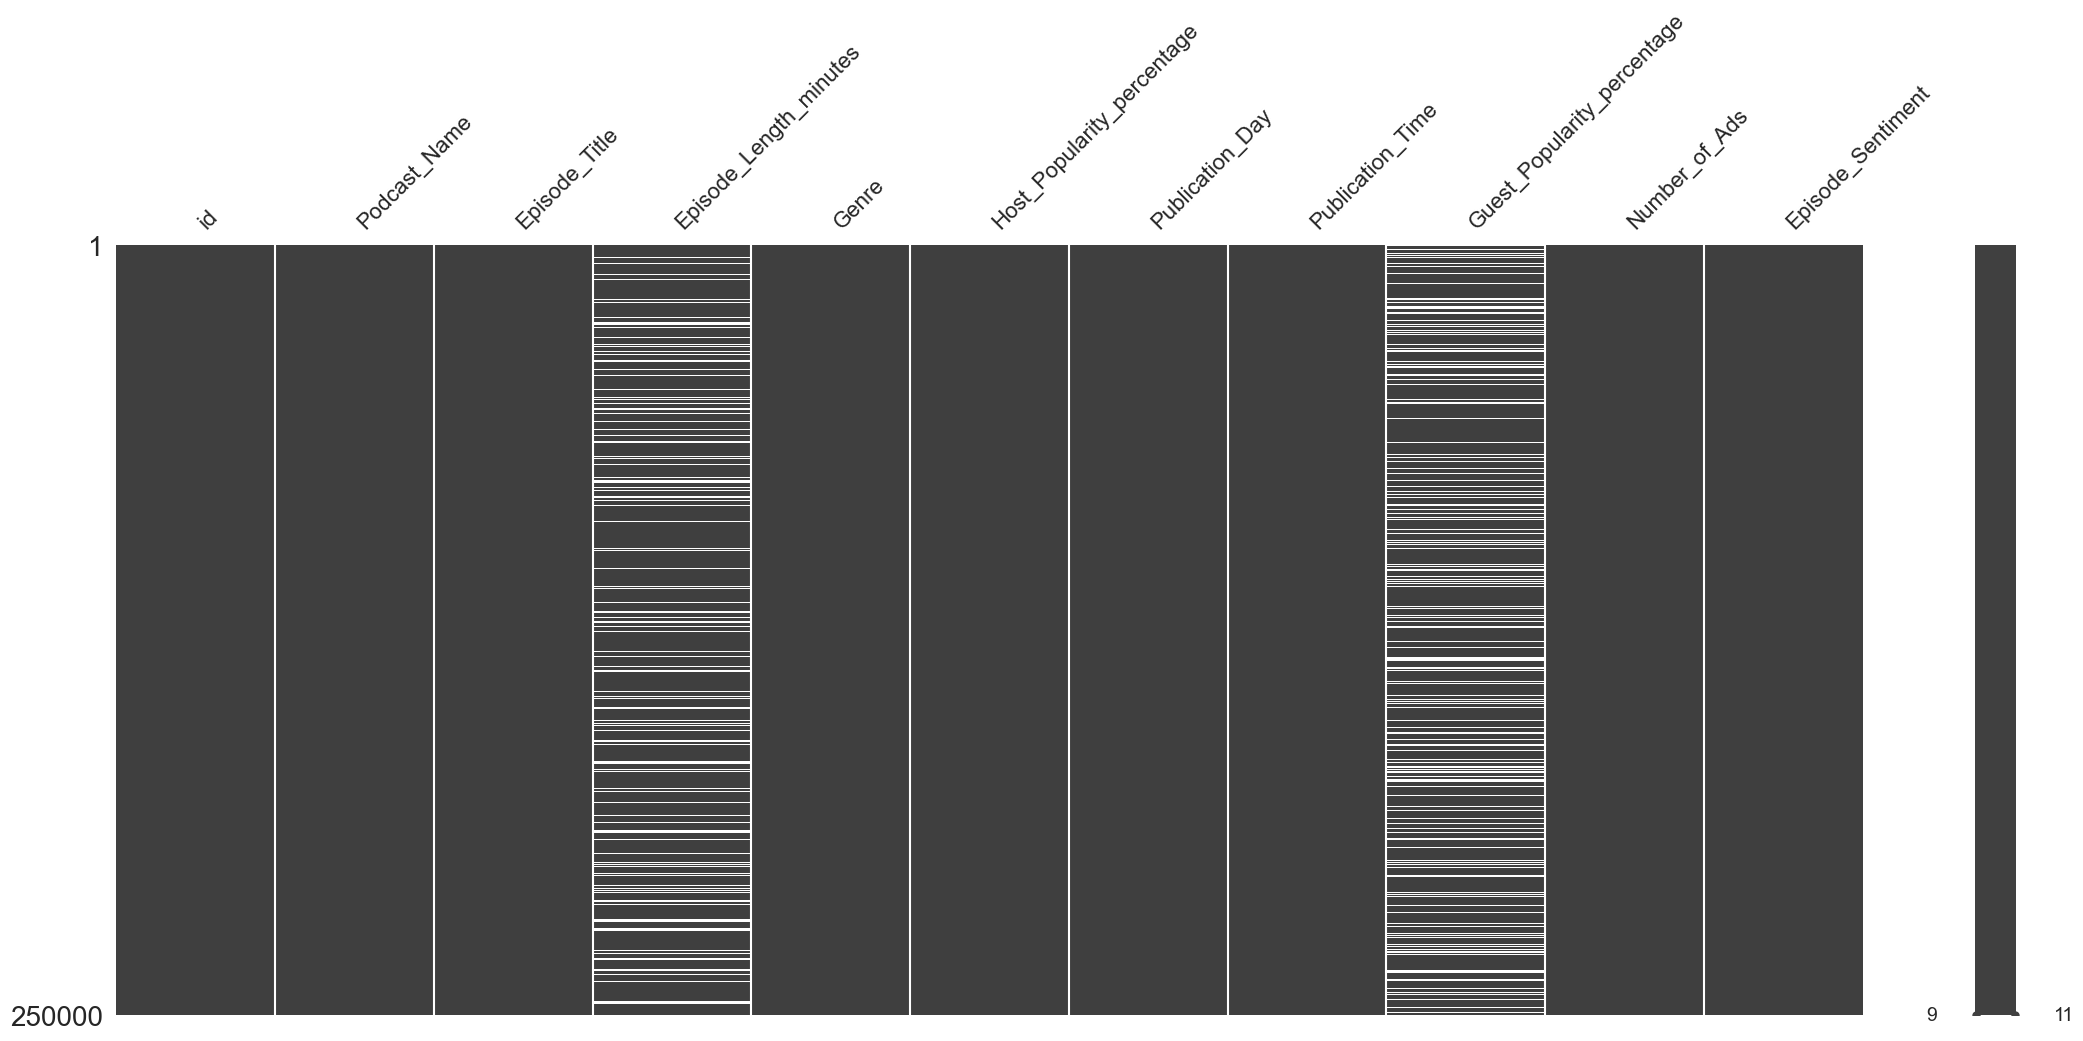

In [31]:
msno.matrix(train)
msno.matrix(test)



In [ ]:
# Step 1: Impute missing guest popularity with host popularity
train['Guest_Popularity_percentage'] = train['Guest_Popularity_percentage'].fillna(train['Host_Popularity_percentage'])
test['Guest_Popularity_percentage'] = test['Guest_Popularity_percentage'].fillna(test['Host_Popularity_percentage'])

# Step 2: Create the aggregate popularity score
train['Aggregate_Popularity'] = (train['Host_Popularity_percentage'] + train['Guest_Popularity_percentage']) / 2
test['Aggregate_Popularity'] = (test['Host_Popularity_percentage'] + test['Guest_Popularity_percentage']) / 2

**Guest Popularity Percent**: This might be missing due to the absense of a guest? Not sure how it would be imputed > == Host popularity maybe ?

**Episode Length Minutes**: Complicated. Firstly, if listening time is also 0, maybe the whole thing can be dropped? Another idea after the next

Impute the average based on a matching podcast name? Priority podcast name? no match genre? [[explore the data in depth before making a decision]]

In [8]:
train[train['Episode_Length_minutes'].isna()]

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
9,9,Music Matters,Episode 81,NaN,Music,82.18,Thursday,Night,59.72,3.0,Neutral,45.94761
29,29,Health Hour,Episode 38,NaN,Health,45.97,Saturday,Evening,15.43,1.0,Negative,25.38384
43,43,Funny Folks,Episode 93,NaN,Comedy,33.02,Saturday,Afternoon,64.70,2.0,Positive,35.11072
49,49,Style Guide,Episode 75,NaN,Lifestyle,78.82,Saturday,Morning,NaN,2.0,Positive,24.40379
...,...,...,...,...,...,...,...,...,...,...,...,...
749926,749926,Current Affairs,Episode 48,NaN,News,78.14,Thursday,Afternoon,50.88,3.0,Positive,14.67000
749936,749936,Melody Mix,Episode 7,NaN,Music,29.15,Sunday,Afternoon,NaN,0.0,Negative,47.79899
749943,749943,World Watch,Episode 42,NaN,News,80.46,Saturday,Afternoon,15.18,1.0,Neutral,80.42861
749954,749954,Life Lessons,Episode 54,NaN,Lifestyle,59.31,Tuesday,Night,44.94,2.0,Neutral,99.33292


In [ ]:

# Step 1: Filter the data
filtered = train[
    (train["Podcast_Name"] == "Athlete's Arena") &
    (train["Episode_Title"] == "Episode 2")
].reset_index(drop=True)

# Step 2: Add an 'Instance' column to track each row
filtered["Instance"] = filtered.index

# Step 3: Melt the DataFrame
melted = filtered.melt(
    id_vars="Instance",
    value_vars=["Episode_Length_minutes", "Listening_Time_minutes"],
    var_name="Metric",
    value_name="Minutes"
)

fig = px.bar(
    melted,
    x="Instance",
    y="Minutes",
    color="Metric",
    barmode="group",
    title="Episode vs Listening Time — 'Athlete's Arena: Episode 1'",
    labels={"Instance": "Instance #", "Minutes": "Minutes"}
)

fig.show()


So firstly... Podcast Name and Episode Title have so many duplicated entries, in the specific columns, but not for their entire row. A quick check of all the different variations of the same episode name and Podcast names show vastly different entries. Thus this should **not** be used for imputation of missing data. But it does briefly indicate a potential pattern in the ratio. Soke further analysis of the ratios and their combinations could determine what could be a good imputation method (or prove that no reliable ones exist)

In [13]:
# Filter for valid episode lengths
Train_clean = train[
    (train["Episode_Length_minutes"].notna()) &
    (train["Episode_Length_minutes"] > 0)
].copy()

# Create the ratio
Train_clean["listen_ratio"] = Train_clean["Listening_Time_minutes"] / Train_clean["Episode_Length_minutes"]

# Select only numeric columns
numerics = Train_clean.select_dtypes(include="number")

# Include the ratio in the set
correlation_matrix = numerics.corr()

# Sort by listen_ratio
correlation_matrix["Listening_Time_minutes"].sort_values(ascending=False)


Listening_Time_minutes         1.000000
Episode_Length_minutes         0.916749
listen_ratio                   0.418532
Host_Popularity_percentage     0.048337
id                            -0.000619
Guest_Popularity_percentage   -0.013251
Number_of_Ads                 -0.119784
Name: Listening_Time_minutes, dtype: float64

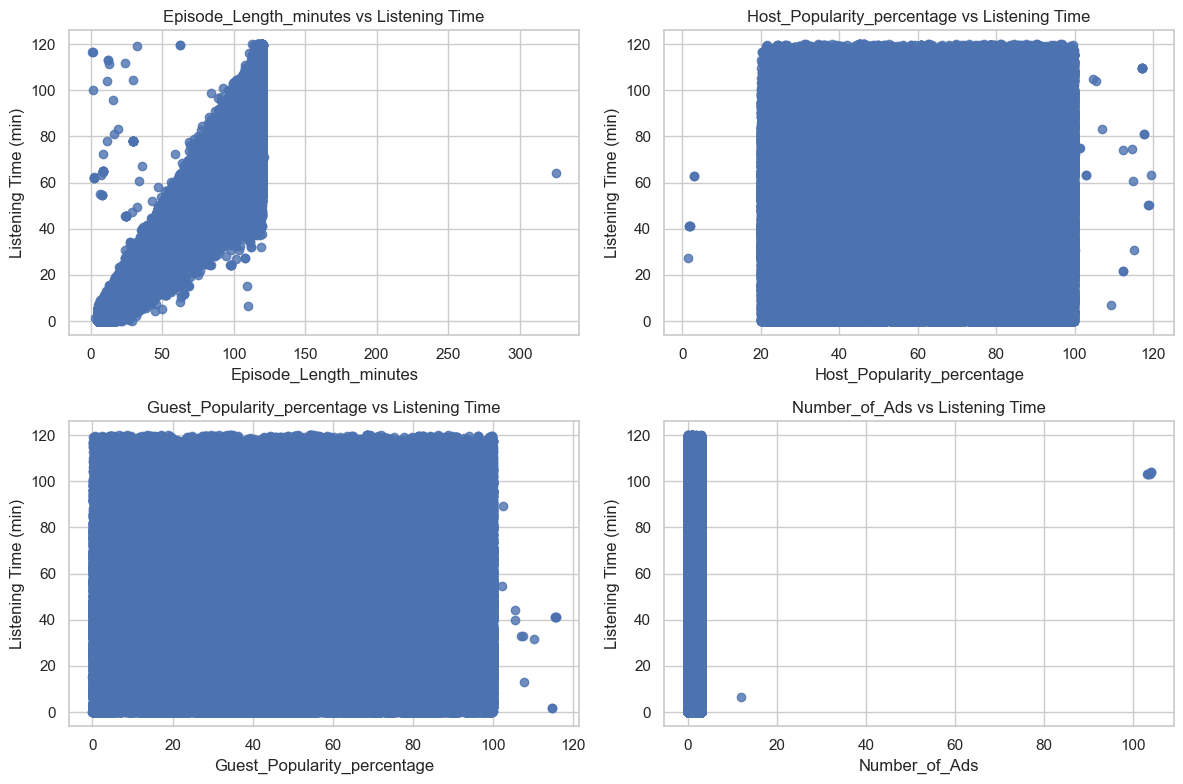

In [16]:
# Drop rows with missing values in key columns
df_clean = train.dropna(subset=['Episode_Length_minutes', 'Guest_Popularity_percentage'])

# Features to plot against Listening Time
features = [
    'Episode_Length_minutes',
    'Host_Popularity_percentage',
    'Guest_Popularity_percentage',
    'Number_of_Ads'
]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(df_clean[feature], df_clean['Listening_Time_minutes'], alpha=0.8)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Listening Time (min)')
    axes[i].set_title(f'{feature} vs Listening Time')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

- Outliers for Guest popularity (>100%)
- Outliers for number of ads (I feel like it should only be 1,2 or 3)
- Outliers for host popularity (>100%)


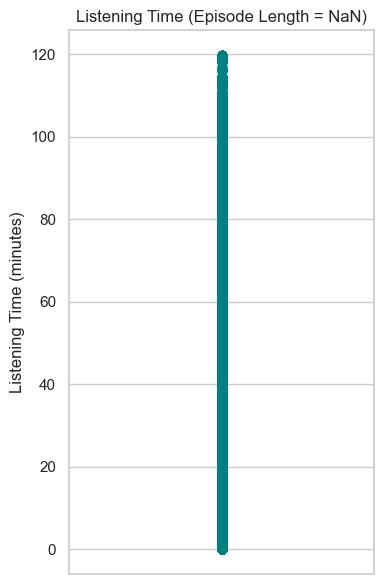

In [21]:
import matplotlib.pyplot as plt

# Filter rows where episode length is NaN
missing_length = train[train['Episode_Length_minutes'].isna()]

# Just plot listening times vertically
plt.figure(figsize=(4, 6))
plt.scatter(x=[0]*len(missing_length), y=missing_length['Listening_Time_minutes'], alpha=0.6, color='teal')
plt.title('Listening Time (Episode Length = NaN)')
plt.ylabel('Listening Time (minutes)')
plt.xticks([])  # remove x-axis ticks
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [22]:
missing_length# Drop rows with missing episode length to avoid errors in comparison
valid_rows = train.dropna(subset=['Episode_Length_minutes'])

# Check where listening time is greater than episode length
over_listened = valid_rows[valid_rows['Listening_Time_minutes'] > valid_rows['Episode_Length_minutes']]

# Count and optionally view them
print(f"Rows where listening time > episode length: {len(over_listened)}")
display(over_listened.head())

Rows where listening time > episode length: 2568


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
113,113,Current Affairs,Episode 44,17.94000,News,96.55,Saturday,Morning,13.40,1.0,Neutral,17.94199
407,407,Sound Waves,Episode 56,11.26000,Music,44.26,Wednesday,Night,66.04,0.0,Positive,11.26579
864,864,Life Lessons,Episode 29,28.92000,Lifestyle,49.84,Wednesday,Morning,19.85,2.0,Neutral,28.92051
948,948,Educational Nuggets,Episode 59,96.10732,Education,85.95,Tuesday,Evening,90.83,2.0,Neutral,96.10741
1316,1316,Market Masters,Episode 71,64.08000,Business,30.51,Sunday,Night,28.21,0.0,Positive,68.63865


/var/folders/dx/yc5x9wm55_v2k4vd7rcv_8r00000gn/T/ipykernel_21229/1075628055.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



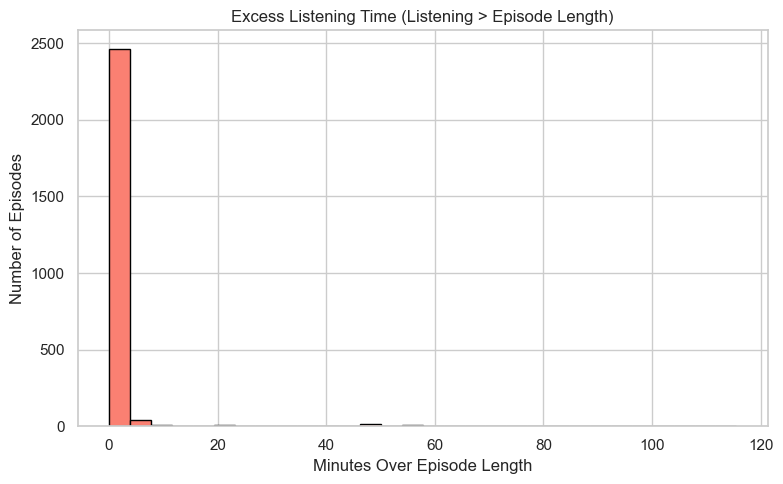

In [24]:
import matplotlib.pyplot as plt

# Step 1: Drop rows with missing Episode Length
valid_rows = train.dropna(subset=['Episode_Length_minutes'])

# Step 2: Filter rows where Listening Time > Episode Length
over_listened = valid_rows[valid_rows['Listening_Time_minutes'] > valid_rows['Episode_Length_minutes']]

# Step 3: Calculate how much extra time was listened
over_listened['Excess_Listen_Time'] = over_listened['Listening_Time_minutes'] - over_listened['Episode_Length_minutes']

# Step 4: Plot histogram of Excess Listen Time
plt.figure(figsize=(8, 5))
plt.hist(over_listened['Excess_Listen_Time'], bins=30, color='salmon', edgecolor='black')
plt.title('Excess Listening Time (Listening > Episode Length)')
plt.xlabel('Minutes Over Episode Length')
plt.ylabel('Number of Episodes')
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# Analyse the dataset
report = sv.analyze(train)

# Show in browser or save
report.show_html("sweetviz_podcast_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_podcast_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [44]:
# Function to detect IQR outliers
def detect_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (series < lower_bound) | (series > upper_bound)

# Clean TRAIN set (includes target column)
def clean_train(df):
    df = df.copy()
    
    df = df.dropna(subset=[
        'Episode_Length_minutes', 
        'Guest_Popularity_percentage', 
        'Listening_Time_minutes'
    ])
    
    df = df[
        (df['Host_Popularity_percentage'].between(18, 101)) &
        (df['Guest_Popularity_percentage'].between(18, 101))
    ]
    
    features = [
        'Episode_Length_minutes',
        'Host_Popularity_percentage',
        'Guest_Popularity_percentage',
        'Number_of_Ads'
    ]

    iqr_outlier_mask = pd.Series(False, index=df.index)
    for feature in features:
        iqr_outlier_mask |= detect_outliers_iqr(df[feature])

    over_listener_mask = (df['Listening_Time_minutes'] - df['Episode_Length_minutes']) >= 15
    combined_outlier_mask = iqr_outlier_mask | over_listener_mask

    return df[~combined_outlier_mask].copy()

# Clean TEST set (no target)
def clean_test(df):
    df = df.copy()
    
    df = df.dropna(subset=[
        'Episode_Length_minutes', 
        'Guest_Popularity_percentage'
    ])
    
    df = df[
        (df['Host_Popularity_percentage'].between(18, 101)) &
        (df['Guest_Popularity_percentage'].between(0.01, 101))
    ]
    
    features = [
        'Episode_Length_minutes',
        'Host_Popularity_percentage',
        'Guest_Popularity_percentage',
        'Number_of_Ads'
    ]

    iqr_outlier_mask = pd.Series(False, index=df.index)
    for feature in features:
        iqr_outlier_mask |= detect_outliers_iqr(df[feature])

    return df[~iqr_outlier_mask].copy()

# Apply
df_no_outliers_train = clean_train(train)
df_no_outliers_test = clean_test(test)

# Print summary
print(f"Train: {len(train)} → {len(df_no_outliers_train)}")
print(f"Test : {len(test)}  → {len(df_no_outliers_test)}")

Train: 750000 → 577470
Test : 250000  → 221237


/var/folders/dx/yc5x9wm55_v2k4vd7rcv_8r00000gn/T/ipykernel_21229/2851004749.py:59: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/Users/williamcatt/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



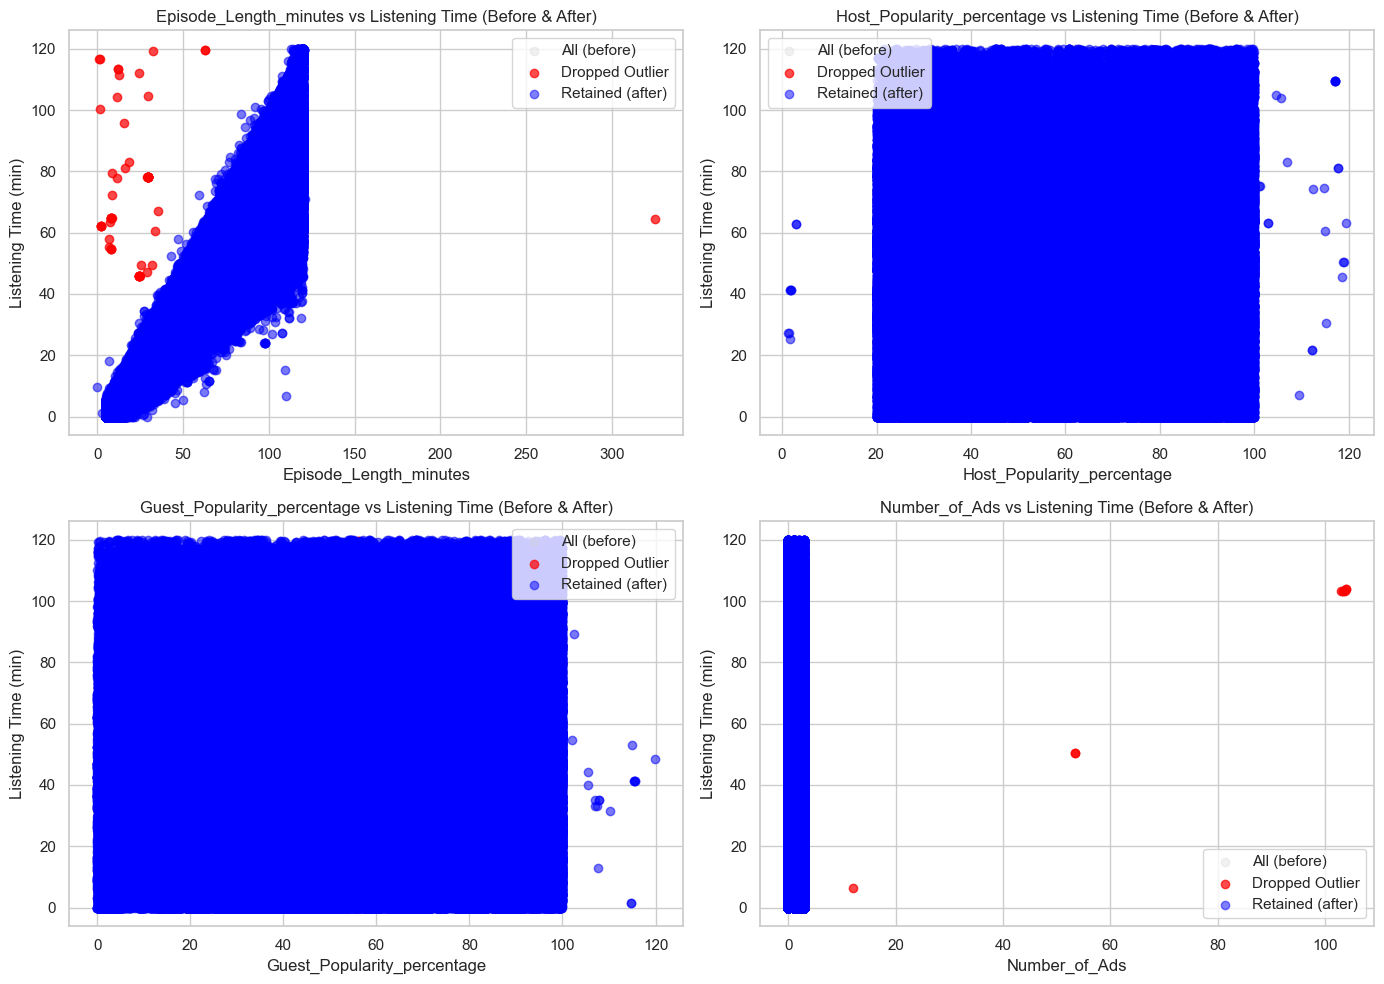

In [40]:
import matplotlib.pyplot as plt

# Define features to check
features = [
    'Episode_Length_minutes',
    'Host_Popularity_percentage',
    'Guest_Popularity_percentage',
    'Number_of_Ads'
]

# Function to detect IQR outliers
def detect_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (series < lower_bound) | (series > upper_bound)

# Create outlier masks
iqr_outlier_mask = pd.Series(False, index=train.index)
for feature in features:
    iqr_outlier_mask |= detect_outliers_iqr(train[feature])

# Over-listener mask (only for train, not test)
over_listener_mask = (train['Listening_Time_minutes'] - train['Episode_Length_minutes']) >= 15

# Combine both masks
combined_outlier_mask = iqr_outlier_mask | over_listener_mask

# Create cleaned version
df_no_outliers = train[~combined_outlier_mask].copy()

# Plot before vs after
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]

    # All points
    ax.scatter(train[feature], train['Listening_Time_minutes'], c='lightgrey', label='All (before)', alpha=0.3)

    # Outliers removed
    ax.scatter(train.loc[combined_outlier_mask, feature],
               train.loc[combined_outlier_mask, 'Listening_Time_minutes'],
               color='red', label='Dropped Outlier', alpha=0.7)

    # Points kept
    ax.scatter(df_no_outliers[feature], df_no_outliers['Listening_Time_minutes'],
               color='blue', label='Retained (after)', alpha=0.5)

    ax.set_title(f'{feature} vs Listening Time (Before & After)')
    ax.set_xlabel(feature)
    ax.set_ylabel('Listening Time (min)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:


# Set up the visual style
sns.set(style="whitegrid")

# Genre vs Listening Time
plt.figure(figsize=(8, 5))
sns.boxplot(x='Genre', y='Listening_Time_minutes', data=train)
plt.title('Listening Time by Genre')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Publication Day vs Listening Time
plt.figure(figsize=(8, 5))
sns.boxplot(x='Publication_Day', y='Listening_Time_minutes', data=train)
plt.title('Listening Time by Publication Day')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Publication Time vs Listening Time
plt.figure(figsize=(8, 5))
sns.boxplot(x='Publication_Time', y='Listening_Time_minutes', data=train)
plt.title('Listening Time by Publication Time')
plt.tight_layout()
plt.show()



In [35]:
from sklearn.preprocessing import LabelEncoder

# List of categorical features to encode
cat_features = ['Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']

# Initialise encoders dictionary (to use same encoder for train/test)
encoders = {}

for col in cat_features:
    le = LabelEncoder()
    # Fit on combined data to ensure consistent labels across train/test
    combined_data = pd.concat([train[col], test[col]], axis=0)
    le.fit(combined_data)

    train[col + '_Enc'] = le.transform(train[col])
    test[col + '_Enc'] = le.transform(test[col])

    encoders[col] = le  # Save encoders if needed later (e.g. inverse_transform)

# Optional: drop original text columns if you're ready to model
# train.drop(columns=cat_features, inplace=True)
# test.drop(columns=cat_features, inplace=True)